In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,  LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
df = pd.read_csv("masa_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [33]:
df["Age Group"] = pd.cut(df["Age"], bins=[0,9,19,29,39,49,59,69,79,89,99,109,119], labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-109", "110-119"])
df


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Age Group
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81,80-89
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71,70-79
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32,30-39
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32,30-39
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31,30-39
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40,40-49
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57,50-59
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63,60-69


#### Chi-Squared Test

##### Claim vs Product Name

In [9]:
claim_product = pd.crosstab(df["Product Name"], df["Claim"], margins=False)
claim_product


Claim,No,Yes
Product Name,,
1 way Comprehensive Plan,3322,9
2 way Comprehensive Plan,13016,142
24 Protect,247,0
Annual Gold Plan,173,21
Annual Silver Plan,1266,157
Annual Travel Protect Gold,90,10
Annual Travel Protect Platinum,50,3
Annual Travel Protect Silver,82,4
Basic Plan,5446,23


In [10]:
stat, p, dof, expected = stats.chi2_contingency(claim_product)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


##### Claim vs Distribution Channel

In [15]:
claim_channel = pd.crosstab(df["Distribution Channel"], df["Claim"], margins=False)
claim_channel

Claim,No,Yes
Distribution Channel,,
Offline,1090,17
Online,61309,910


In [28]:
stat, p, dof, expected = stats.chi2_contingency(claim_product)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.0
Dependent (reject H0)


##### Claim vs Destination

In [30]:
claim_destination = pd.crosstab(df["Destination"], df["Claim"], margins=False)
claim_destination

Claim,No,Yes
Destination,,
ALBANIA,1,0
ANGOLA,1,0
ARGENTINA,21,1
ARMENIA,1,0
AUSTRALIA,3656,38
...,...,...
VENEZUELA,5,0
VIET NAM,1657,12
"VIRGIN ISLANDS, U.S.",1,0


In [34]:
stat, p, dof, expected = stats.chi2_contingency(claim_destination)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.5186644140809715e-123
Dependent (reject H0)


##### Claim vs Age Group

In [36]:
claim_age = pd.crosstab(df["Age Group"], df["Claim"], margins=False)
claim_age

Claim,No,Yes
Age Group,,
0-9,31,0
10-19,213,7
20-29,7312,203
30-39,36116,425
40-49,9290,140
50-59,5321,85
60-69,2390,40
70-79,628,15
80-89,122,2


In [37]:
stat, p, dof, expected = stats.chi2_contingency(claim_age)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.938820527934441e-20
Dependent (reject H0)


### Correlation Matrix
#### - Pearson

However, I think Pearson should not be used because our data is definitely not normally distributed

In [71]:
df.corr(method = 'pearson')

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.429235,0.344772,0.002468
Net Sales,0.429235,1.000000,0.651315,0.037756
Commision (in value),0.344772,0.651315,1.000000,0.118348
Age,0.002468,0.037756,0.118348,1.000000


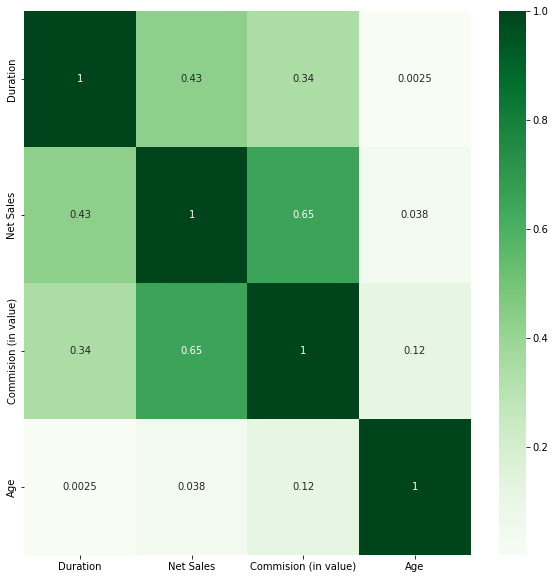

In [72]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(method = 'pearson'), annot=True, cmap = "Greens")
plt.show()

#### - Kendall
I think Kendall or Spearman also can be used

In [73]:
df.corr(method = 'kendall')

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.199993,0.093736,-0.011277
Net Sales,0.199993,1.000000,0.260103,0.016856
Commision (in value),0.093736,0.260103,1.000000,0.115421
Age,-0.011277,0.016856,0.115421,1.000000


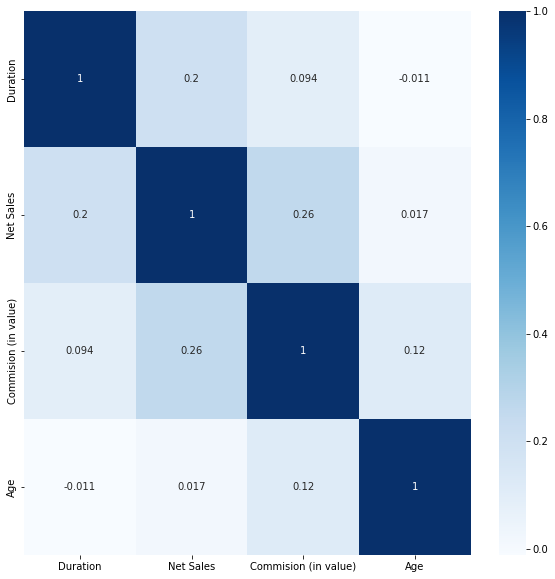

In [74]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(method = 'kendall'), annot=True, cmap = "Blues")
plt.show()

#### - Spearman

In [75]:
df.corr(method = 'spearman')

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.282096,0.123518,-0.015910
Net Sales,0.282096,1.000000,0.303544,0.023497
Commision (in value),0.123518,0.303544,1.000000,0.146004
Age,-0.015910,0.023497,0.146004,1.000000


In [76]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(method = 'spearman'), annot=True, cmap = "Blues")
plt.show()

KeyboardInterrupt: 

In [ ]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [ ]:
from scipy.stats import spearmanr
features = []
for item in df.columns:
    if df[item].dtype == "object":
        continue
    else:
        features.append(item)
        

for feature1 in features:
    for feature2 in features:
        coefficient, p = spearmanr(df[feature1].values, df[feature2].values)
        
        print(f"Coefficient of {feature1} and {feature2} is {coefficient} with p value of {round(p,4)}")

Coefficient of Duration and Duration is 0.9999999999999998 with p value of 0.0
Coefficient of Duration and Net Sales is 0.28209570660157546 with p value of 0.0
Coefficient of Duration and Commision (in value) is 0.12351803243758969 with p value of 0.0
Coefficient of Duration and Age is -0.015909913189712438 with p value of 0.0001
Coefficient of Net Sales and Duration is 0.2820957066015754 with p value of 0.0
Coefficient of Net Sales and Net Sales is 0.9999999999999998 with p value of 0.0
Coefficient of Net Sales and Commision (in value) is 0.30354371691361476 with p value of 0.0
Coefficient of Net Sales and Age is 0.023497226213689763 with p value of 0.0
Coefficient of Commision (in value) and Duration is 0.12351803243758969 with p value of 0.0
Coefficient of Commision (in value) and Net Sales is 0.30354371691361476 with p value of 0.0
Coefficient of Commision (in value) and Commision (in value) is 1.0 with p value of 0.0
Coefficient of Commision (in value) and Age is 0.146004392859066

### Mising Value Treatment

In [ ]:
# Find out the sum of null data for each feature
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [ ]:
# Find out the percentage of null data for each feature
df.isnull().sum()/len(df)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.229827
Age                      0.000000
dtype: float64

In [ ]:
df.drop("Gender", axis=1, inplace=True)


### Outlier Analysis and Treatment

In [ ]:
# Removing negative net sales
df = df[df["Net Sales"] >= 0]
df = df[df["Duration"] >= 0]
df.to_csv("removed_negative")
df = pd.read_csv("removed_negative")


In [ ]:
df

,Unnamed: 0,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44
1,22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,25
2,23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,34
3,24,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,26
4,25,C2B,Airlines,Online,Annual Silver Plan,No,364,SINGAPORE,389.00,97.25,30
...,...,...,...,...,...,...,...,...,...,...,...
62638,63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.00,12.25,31
62639,63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.00,14.00,40
62640,63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.00,6.30,57
62641,63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.00,6.30,63


In [ ]:
df.describe()


,Unnamed: 0,Duration,Net Sales,Commision (in value),Age
count,62643.000000,62643.000000,62643.000000,62643.000000,62643.000000
mean,31621.479128,48.960921,41.803969,9.655532,39.957202
std,18294.901131,101.929382,47.635665,19.668634,13.984385
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,15753.500000,9.000000,18.000000,0.000000,35.000000
50%,31568.000000,22.000000,27.000000,0.000000,36.000000
75%,47498.500000,52.000000,49.000000,10.640000,43.000000
max,63325.000000,4881.000000,810.000000,283.500000,118.000000


In [ ]:
from collections import Counter

def detect_outliers(df, feature):
        
    #1st quartile
    Q1 =  np.percentile(df[feature],25)
    #3rd quartile
    Q3 = np.percentile(df[feature],75)
    #IQR
    IQR = Q3 - Q1
    #outlier step
    outlier_step = IQR * 1.5
    #detect outlier and their indices
    upper_limit = Q3 + outlier_step
    lower_limit = Q1 - outlier_step
    outlier_list_col = df[(df[feature] > Q3 + outlier_step) | (df[feature] < Q1 - outlier_step)].index
    outlier_list_col = list(outlier_list_col)
    # number of rows with outliers
    len_outlier = ((df[feature] > Q3 + outlier_step) | (df[feature] < Q1 - outlier_step)).sum()
    print(f"{feature}:\nQ1: {Q1}\nQ3:{Q3}\nIQR: {IQR}\nUpper Limit: {upper_limit}\nLower Limit: {lower_limit}\nNumber of outlier rows: {len_outlier}\n")
    return outlier_list_col, upper_limit, lower_limit




In [ ]:
features = ["Duration", "Net Sales", "Commision (in value)", "Age"]
outlier_id = []
upper_bounds = []
lower_bounds = []
for feature in features:
    outlier, upper_bound, lower_bound = detect_outliers(df, feature)
    outlier_id += outlier_id
    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)

id = np.unique(outlier_id)


Duration:
Q1: 9.0
Q3:52.0
IQR: 43.0
Upper Limit: 116.5
Lower Limit: -55.5
Number of outlier rows: 5612

Net Sales:
Q1: 18.0
Q3:49.0
IQR: 31.0
Upper Limit: 95.5
Lower Limit: -28.5
Number of outlier rows: 4886

Commision (in value):
Q1: 0.0
Q3:10.64
IQR: 10.64
Upper Limit: 26.6
Lower Limit: -15.96
Number of outlier rows: 6975

Age:
Q1: 35.0
Q3:43.0
IQR: 8.0
Upper Limit: 55.0
Lower Limit: 23.0
Number of outlier rows: 7311



In [ ]:
# the reason of using loc is because the normal df[x][y] = mean | median will cause the df to retain a copy of original dataframe, hence the assignation of value is failed

for x in features:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median

In [ ]:
# the reason of using loc is because the normal df[x][y] = mean | median will cause the df to retain a copy of original dataframe, hence the assignation of value is failed


for x in features:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median

df.to_csv("cleaned_data")
df.to_excel("cleaned.xlsx", sheet_name="cleaned")


In [ ]:
for i in range(len(features)):
     upper = upper_bounds[i]
     lower = lower_bounds[i]
     len_outlier = ((df[features[i]] > upper) | (df[features[i]] < lower)).sum()
     print(f"Number of outlier rows: {len_outlier}\n")


    

Number of outlier rows: 0

Number of outlier rows: 0

Number of outlier rows: 0

Number of outlier rows: 0



In [ ]:
x = df.drop(["Commision (in value)"], axis=1)
y = df["Commision (in value)"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

enc = OneHotEncoder(handle_unknown="ignore")
x_train = enc.fit_transform(x_train)
x_test = enc.transform(x_test)


ValueError: y contains previously unseen labels: [0.42, 0.44, 0.66, 1.11, 1.32, 1.39, 1.7, 2.19, 2.21, 2.24, 2.47, 2.51, 2.6, 2.66, 2.72, 2.9, 3.01, 3.14, 3.23, 3.52, 3.6, 3.73, 3.8, 3.85, 3.9, 3.94, 3.95, 5.5, 5.73, 6.28, 6.42, 6.57, 6.67, 6.73, 6.85, 6.9, 7.02, 7.21, 7.69, 7.8, 8.03, 8.56, 8.71, 8.77, 8.9, 8.99, 10.22, 10.66, 11.58, 11.83, 12.09, 12.17, 12.96, 13.02, 13.57, 14.18, 14.63]

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd =  SGDClassifier()
# fit on the training set
sgd.fit(x_train, y_train)
# predict on test set
yhat = sgd.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

ValueError: Unknown label type: (array([ 0.  ,  0.02,  0.04,  0.05,  0.09,  0.11,  0.13,  0.14,  0.15,
        0.16,  0.18,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.31,  0.32,  0.34,  0.36,  0.37,  0.38,
        0.41,  0.43,  0.45,  0.47,  0.49,  0.5 ,  0.51,  0.54,  0.56,
        0.58,  0.59,  0.61,  0.63,  0.65,  0.67,  0.68,  0.69,  0.7 ,
        0.71,  0.74,  0.75,  0.77,  0.78,  0.79,  0.8 ,  0.81,  0.83,
        0.84,  0.85,  0.86,  0.87,  0.88,  0.9 ,  0.93,  0.94,  0.95,
        0.96,  0.97,  0.98,  0.99,  1.  ,  1.01,  1.02,  1.03,  1.05,
        1.06,  1.07,  1.08,  1.09,  1.1 ,  1.12,  1.13,  1.16,  1.17,
        1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,  1.24,  1.25,  1.26,
        1.27,  1.29,  1.3 ,  1.31,  1.33,  1.34,  1.37,  1.42,  1.43,
        1.47,  1.48,  1.5 ,  1.51,  1.53,  1.54,  1.55,  1.57,  1.59,
        1.6 ,  1.61,  1.63,  1.64,  1.65,  1.66,  1.68,  1.69,  1.71,
        1.72,  1.73,  1.74,  1.75,  1.76,  1.8 ,  1.82,  1.83,  1.84,
        1.86,  1.88,  1.9 ,  1.94,  1.95,  1.96,  1.97,  1.99,  2.  ,
        2.01,  2.02,  2.03,  2.06,  2.13,  2.15,  2.16,  2.17,  2.2 ,
        2.22,  2.23,  2.25,  2.34,  2.35,  2.36,  2.38,  2.41,  2.42,
        2.45,  2.46,  2.5 ,  2.52,  2.56,  2.57,  2.62,  2.64,  2.73,
        2.74,  2.75,  2.76,  2.8 ,  2.81,  2.83,  2.87,  2.88,  2.89,
        2.91,  2.92,  2.95,  2.96,  3.02,  3.04,  3.05,  3.08,  3.09,
        3.1 ,  3.15,  3.21,  3.25,  3.28,  3.29,  3.32,  3.33,  3.35,
        3.38,  3.39,  3.41,  3.45,  3.46,  3.53,  3.55,  3.61,  3.62,
        3.66,  3.68,  3.74,  3.75,  3.76,  3.77,  3.87,  3.92,  4.  ,
        4.02,  4.03,  4.04,  4.05,  4.06,  4.13,  4.18,  4.2 ,  4.21,
        4.25,  4.28,  4.3 ,  4.31,  4.38,  4.39,  4.4 ,  4.42,  4.43,
        4.47,  4.5 ,  4.54,  4.55,  4.58,  4.59,  4.6 ,  4.63,  4.64,
        4.65,  4.67,  4.72,  4.74,  4.8 ,  4.88,  4.91,  4.92,  4.93,
        4.94,  4.99,  5.  ,  5.04,  5.06,  5.12,  5.13,  5.14,  5.2 ,
        5.25,  5.26,  5.34,  5.38,  5.48,  5.53,  5.55,  5.6 ,  5.63,
        5.72,  5.75,  5.79,  5.85,  5.88,  5.91,  5.93,  5.94,  5.95,
        5.98,  6.  ,  6.01,  6.13,  6.17,  6.2 ,  6.24,  6.25,  6.3 ,
        6.32,  6.38,  6.39,  6.47,  6.5 ,  6.51,  6.56,  6.63,  6.65,
        6.66,  6.75,  6.82,  6.84,  6.88,  6.94,  6.96,  6.99,  7.  ,
        7.05,  7.13,  7.16,  7.17,  7.25,  7.35,  7.36,  7.38,  7.47,
        7.5 ,  7.64,  7.67,  7.7 ,  7.76,  7.87,  7.89,  7.91,  7.95,
        7.96,  8.  ,  8.05,  8.06,  8.1 ,  8.13,  8.21,  8.22,  8.25,
        8.36,  8.38,  8.4 ,  8.49,  8.5 ,  8.57,  8.63,  8.68,  8.7 ,
        8.75,  8.76,  8.78,  8.81,  8.85,  8.88,  8.96,  9.  ,  9.1 ,
        9.13,  9.19,  9.2 ,  9.25,  9.26,  9.3 ,  9.38,  9.45,  9.57,
        9.59,  9.75,  9.87,  9.97, 10.  , 10.05, 10.13, 10.15, 10.16,
       10.18, 10.25, 10.32, 10.33, 10.38, 10.5 , 10.63, 10.64, 10.69,
       10.83, 10.85, 10.89, 11.  , 11.02, 11.06, 11.1 , 11.11, 11.13,
       11.2 , 11.21, 11.25, 11.34, 11.38, 11.5 , 11.54, 11.55, 11.63,
       11.7 , 11.72, 11.75, 11.78, 11.86, 11.88, 11.9 , 12.  , 12.07,
       12.13, 12.14, 12.25, 12.3 , 12.38, 12.39, 12.4 , 12.45, 12.5 ,
       12.54, 12.56, 12.6 , 12.63, 12.75, 12.94, 12.95, 13.  , 13.13,
       13.16, 13.2 , 13.21, 13.25, 13.31, 13.38, 13.42, 13.49, 13.5 ,
       13.63, 13.65, 13.69, 13.75, 13.86, 13.88, 13.92, 13.95, 14.  ,
       14.1 , 14.13, 14.16, 14.25, 14.38, 14.44, 14.46, 14.5 , 14.53,
       14.55, 14.7 , 14.75, 14.79, 14.85, 14.88, 15.  , 15.16, 15.19,
       15.28, 15.38, 15.4 , 15.44, 15.5 , 15.56, 15.57, 15.6 , 15.75]),)